Nithin Tammishetti
<br>
158001785

## Collecting and Analyzing Graduate School Application Data 

### Project Goals
As I applied to various graduate programs, one of my biggest sources of frustration was the lack of proper acceptance/rejection data for all of the grad schools that I applied to. But after some searching I found one online forum where students post their results anonymously: thegradcafe.com. However, the posts can be very vague and it can be frustrating to sift through the giant mound of date trying to compare your application strength with that of other students. I had spent countless hours sifting through each post, comparing my statistics with thos of other accepted/rejected students.

The purpose of my project is to provide an easy way for students to access and summarize acceptance data. The project aims to collect and process the mountain of data available from thegradcafe.com into a viable format for analysis. The project will provide students with clean summaries and visualizations of the forum's data. In the end, I hope to provide a mechanism by which applicants can measure their likelihood of acceptance, and plan accordingly. No one wants to wait for a university's response for months, only to find a rejection.

### Data Source and Collection

The source of the data is this website: https://thegradcafe.com/survey/index.php
<br><br>

Data is collected and saved using the code in scraper.py. The main function of the script is get_data(Search_String, filename). The function takes two parameters, the string you wish to search by and the filename to save to.
<br><br>
For example: get_data('Rutgers University', 'rutgers.csv') will scrape the website for Rutgers' data and generate a csv file.

The preprocessing steps are described in detail in the notebook file 'Cleaning.ipynb'. The data format is describe below.

### Data Format

The data is scraped from HTML tables that the script will query from the website. For a given search string, the result is a collection of HTML tables spread across many pages. The script will join all of these tables, clean their content, and save the results to a CSV file.

The contents of the resulting CSV files are describe below:

Name: The name of the university

Major: The major indicated by the poster

Degree: Masters or PhD

Status: Accepted, Rejected, Waitlisted, or Other (Other is simply somthing posters use to post questions)

Notification: The method that the applicant was notified via (about their acceptance/rejection)

Date: Notification date (when they received their response)

GPA,GREV,GREQ,GREW: The applicants' GPA and GRE scores

Nationality: The nationality code of the applicant 
<br>(codes: A: American; U: International, with US degree; I: International, without US degree; O: Other; ?: Unknown)

Post_Date: The date the post was submitted

Comment: The posters personal comment


### Data Analysis and Visualization
The notebook named 'Cleaning' describes the initial preprocessing measures that I took to generate clean csv files from 
thegradcafe.com. Here I hope to demonstrate what can be done with this data and provide useful visualizations.

In [90]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from scraper import generate_url, get_data #This is the scraper that I wrote to generate csv files from thegradcafe.com

In [4]:
df = pd.DataFrame.from_csv('data/stanford.csv')
df.head()

,Major,Degree,Semester,Status,Notification,Date,GPA,GREV,GREQ,GREW,Nationality,Post_Date,Comment
Name,,,,,,,,,,,,,
Stanford University,Philosophy,PhD,F,Rejected,E-mail,23-Mar-2018,n/a,n/a,n/a,n/a,I,24-Mar-2018,NaN
Stanford University,Philosophy,PhD,F,Rejected,E-mail,23-Mar-2018,n/a,n/a,n/a,n/a,A,23-Mar-2018,NaN
Stanford University,(Computer Science,Masters,F,Other,Other,23-Mar-2018,n/a,n/a,n/a,n/a,O,23-Mar-2018,To the posts regarding admits for Stanford is...
Stanford University,Energy Resource Engineering (Petroleum),Masters,F,Other,Other,23-Mar-2018,n/a,n/a,n/a,n/a,I,23-Mar-2018,Anyone still waiting for Energy Resource / Pet...
Stanford University,Department Of Materials Science And Engineering,Masters,F,Accepted,E-mail,22-Mar-2018,n/a,n/a,n/a,n/a,I,22-Mar-2018,NaN


In [21]:
df[df['GPA']=='3.78'].head()

,Major,Degree,Semester,Status,Notification,Date,GPA,GREV,GREQ,GREW,Nationality,Post_Date,Comment
Name,,,,,,,,,,,,,
Stanford University,(Computer Science ),Masters,F,Rejected,E-mail,16-Mar-2018,3.78,154,167,4.00,A,19-Mar-2018,Received an email notifying to check the porta...
Stanford University,Materials Science And Engineering,PhD,F,Accepted,Website,25-Jan-2018,3.78,157,168,5.00,I,26-Jan-2018,NaN
Stanford University,Neurosciences (Biosciences),PhD,F,Rejected,Website,22-Jan-2018,3.78,162,166,5.50,A,22-Jan-2018,Email to check website. Was my first choice ...
Stanford University,Materials Science And Engineering,Masters,F,Accepted,Other,17-Mar-2017,3.78,165,170,5.50,I,18-Mar-2017,NaN
Stanford University,ICME,Masters,F,Accepted,Website,15-Mar-2017,3.78,160,170,4.00,U,15-Mar-2017,Yay! Really expensive though


To analyze stanford's GPAs more thouroughly, it would be helpful to convert the GPA column to the numeric type:

In [316]:
valid = df[df['GPA']!='n/a']
valid = valid[valid['GPA']>'2.00']
valid = valid[valid['GPA']<'4.00']
valid[valid['Status']=='Accepted'].head()

,Major,Degree,Semester,Status,Notification,Date,GPA,GREV,GREQ,GREW,Nationality,Post_Date,Comment
Name,,,,,,,,,,,,,
Stanford University,(Computer Science ),Masters,F,Accepted,E-mail,2018-03-17,3.96,159,169,4.00,I,2018-03-17,I think diversity does matter... Girls go for...
Stanford University,Computer Science,Masters,F,Accepted,E-mail,2018-03-16,3.85,169,163,85.00,U,2018-03-16,UC Berkeley undergraduate. Teaching Assistant ...
Stanford University,Computer Science (CS),Masters,F,Accepted,E-mail,2018-03-16,3.89,166,170,4.50,I,2018-03-16,Same poster as below; correction: email receiv...
Stanford University,Computer Science,Masters,F,Accepted,Website,2018-03-16,3.96,163,170,4.50,I,2018-03-16,Just checked the website and saw my decision. ...
Stanford University,Computer Science,Masters,F,Accepted,Website,2018-03-16,3.92,168,169,5.00,A,2018-03-16,NaN


In [69]:
df['GPA'] = df['GPA'].apply(pd.to_numeric, errors='coerce')
valid = df[df['GPA']>1.0]
valid = df[df['GPA']<4.0]
valid.head()

,Major,Degree,Semester,Status,Notification,Date,GPA,GREV,GREQ,GREW,Nationality,Post_Date,Comment
Name,,,,,,,,,,,,,
Stanford University,(Computer Science ),Masters,F,Rejected,E-mail,16-Mar-2018,3.78,154,167,4.00,A,19-Mar-2018,Received an email notifying to check the porta...
Stanford University,French,PhD,F,Rejected,E-mail,17-Mar-2018,3.86,156,150,5.00,A,17-Mar-2018,Shortlisted and attended the visit (which went...
Stanford University,(Computer Science ),Masters,F,Accepted,E-mail,17-Mar-2018,3.96,159,169,4.00,I,17-Mar-2018,I think diversity does matter... Girls go for...
Stanford University,(Computer Science ),Masters,F,Rejected,E-mail,16-Mar-2018,3.70,156,162,4.00,A,17-Mar-2018,2 letters of rec from distinguished Stanford g...
Stanford University,(Computer Science ),Masters,F,Rejected,E-mail,16-Mar-2018,3.77,161,166,4.00,O,16-Mar-2018,Received an email


Stanford applicants' average GPA (at thegradcafe):

In [153]:
np.mean(valid['GPA'])

3.729062500000002

Average GPA for accepted students

In [154]:
np.mean(valid[valid['Status']=='Accepted']['GPA'])

3.7792045454545455

Average GPA for rejected students

In [155]:
np.mean(valid[valid['Status']=='Rejected']['GPA'])

3.696991404011463

We can do the same for other columns, such as the GRE scores:

In [99]:
df[['GREV','GREQ','GREW']] = df[['GREV','GREQ','GREW']].apply(pd.to_numeric, errors='coerce')
valid = df[df['GREV']>100]
valid = valid[valid['GREV']<=170]
valid = valid[valid['GREV']>80]
valid = valid[valid['GREQ']<=170]
valid = valid[valid['GREQ']>80]
valid = valid[valid['GREW']<=6.0]
valid.head()

,Major,Degree,Semester,Status,Notification,Date,GPA,GREV,GREQ,GREW,Nationality,Post_Date,Comment
Name,,,,,,,,,,,,,
Stanford University,Symbolic Systems,Masters,F,Accepted,E-mail,15-Mar-2018,NaN,162.0,169.0,4.0,U,20-Mar-2018,Really grateful. I Look forward to the open ho...
Stanford University,(Computer Science ),Masters,F,Rejected,E-mail,16-Mar-2018,3.78,154.0,167.0,4.0,A,19-Mar-2018,Received an email notifying to check the porta...
Stanford University,Advanced Mechanical Engineering,Masters,F,Accepted,E-mail,13-Mar-2018,4.00,156.0,170.0,5.0,I,17-Mar-2018,Undergrad from IIT Madras interned at ITV RWT...
Stanford University,(Computer Science,Masters,F,Rejected,E-mail,16-Mar-2018,NaN,168.0,170.0,4.0,I,17-Mar-2018,Reading previous posts I wasn't expecting a r...
Stanford University,(Computer Science ),Masters,F,Rejected,E-mail,17-Mar-2018,NaN,165.0,166.0,4.0,I,17-Mar-2018,EE undergrad from a top 3 African university. ...


GRE averages:

In [100]:
np.mean(valid[['GREV','GREQ','GREW']])

GREV    161.213989
GREQ    165.159280
GREW      4.323753
dtype: float64

In [120]:
valid = valid[valid['GPA']>1.0]
valid = valid[valid['GPA']<4.0]
accepted = valid[valid['Status']=='Accepted']
rejected = valid[valid['Status']=='Rejected']
# valid.plot.scatter(x='GREQ', y='GREV')

A scatter plot indicating acceptances and rejections:

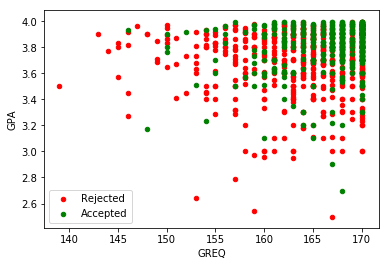

In [122]:
ax = plt.gca()
rejected.plot.scatter(x='GREQ', y='GPA',ax=ax, color='Red',  label='Rejected')
accepted.plot.scatter(x='GREQ', y='GPA',ax=ax, color='Green',  label='Accepted')

Now we easily can do the same with with any university or search parameters we want. For example, let's try generating Yale's
data:

In [146]:
# get_data('Yale University', 'data/yale.csv') # This will scrape, preprocess, and store the search results in yale.csv

In [147]:
df = pd.DataFrame.from_csv('data/yale.csv')
df[['GREV','GREQ','GREW','GPA']] = df[['GREV','GREQ','GREW','GPA']].apply(pd.to_numeric, errors='coerce')
valid = df[df['GREV']>100]
valid = valid[valid['GREV']<=170]
valid = valid[valid['GREV']>80]
valid = valid[valid['GREQ']<=170]
valid = valid[valid['GREQ']>80]
valid = valid[valid['GREW']<=6.0]
valid = valid[valid['GPA']>1.0]
valid = valid[valid['GPA']<4.0]
accepted = valid[valid['Status']=='Accepted']
rejected = valid[valid['Status']=='Rejected']

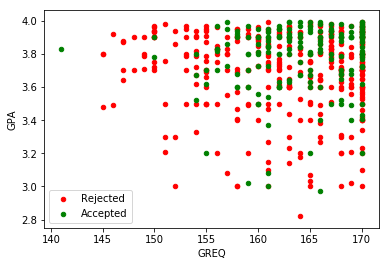

In [149]:
ax = rejected.plot.scatter(x='GREQ', y='GPA', color='Red',  label='Rejected')
accepted.plot.scatter(x='GREQ', y='GPA',ax=ax, color='Green',  label='Accepted')

Now, we may want to determine the distribution of students that applied with American undergrad degrees or students that applied internationally.
<br><br>
Status codes: A: American; U: International, with US degree; I: International, without US degree; O: Other; ?: Unknown

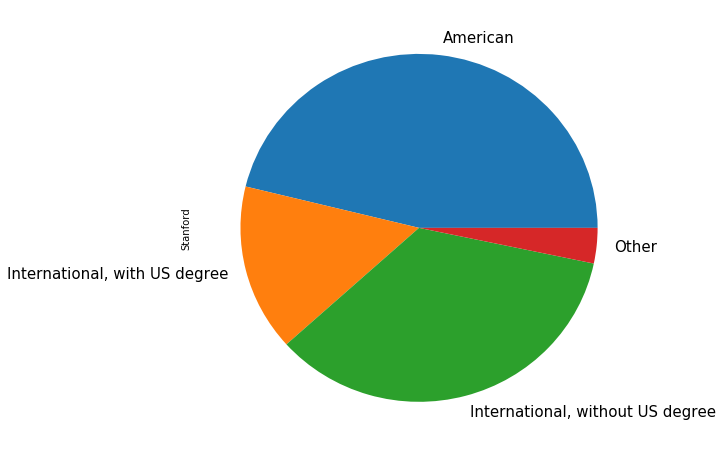

In [301]:
df = pd.DataFrame.from_csv('data/stanford.csv')
pie_data = (len(df[df['Nationality']=='A']), len(df[df['Nationality']=='U']), len(df[df['Nationality']=='I']),
            len(df[df['Nationality']=='O']))
pie_data = pd.Series(pie_data, index= ['A','U','I','O'], name='Stanford')
pie_data.plot.pie(labels=['American','International, with US degree','International, without US degree','Other'],
                  figsize=(8,8), fontsize=15)


We can do the same for Georgia Tech's computer science applicants only. I have the corresponding data stored in 'data/gatech_cs.csv'.
<br><br>
We can also further limit the plot to just accepted students, rejected students, PhD students only etc.
<br> <br>
To generate this particular data, we would call: get_data('Georgia Institute Of Technology computer science', 'data/gatech_cs.csv')

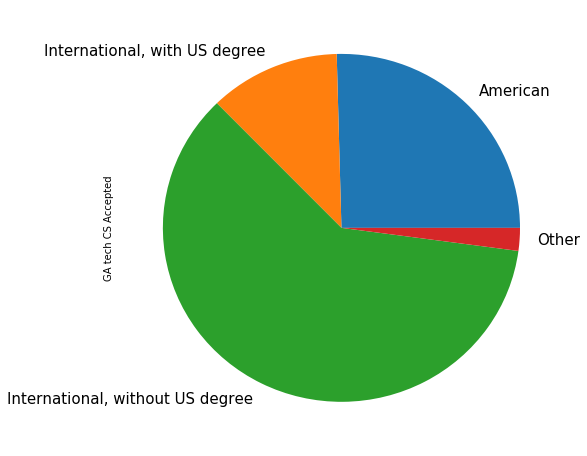

In [308]:
df = pd.DataFrame.from_csv('data/gatech_cs.csv')
df = df[df['Status']=='Accepted']
pie_data = (len(df[df['Nationality']=='A']), len(df[df['Nationality']=='U']), len(df[df['Nationality']=='I']),
            len(df[df['Nationality']=='O']))
pie_data = pd.Series(pie_data, index= ['A','U','I','O'], name='GA tech CS Accepted')
pie_data.plot.pie(labels=['American','International, with US degree','International, without US degree','Other'],
                  figsize=(8,8), fontsize=15)

One of the most frustrating parts of applying to graduate schools is waiting for university responses. A common question for many is about when to expect a response from a university. And many wonder if not receiving a response by March means that they have already been rejected. So it would be very useful for many applicants to know when they should expect notifications from their university.

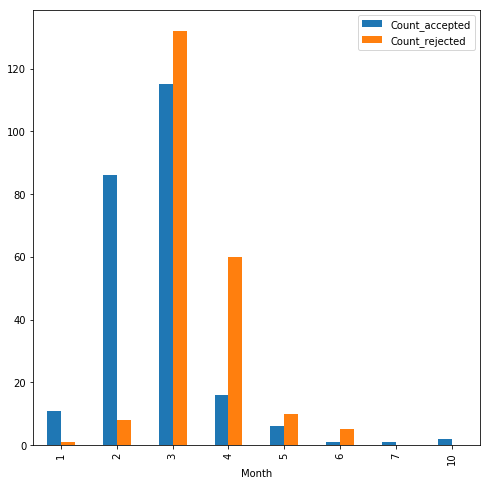

In [309]:
df = pd.DataFrame.from_csv('data/gatech_cs.csv')
pd.to_datetime(['2005/11/23', '2010.12.31', '15-Mar-2018'])
df[['Date','Post_Date']] = df[['Date','Post_Date']].apply(pd.to_datetime, errors='coerce')

accepted = df[df['Status']=='Accepted']
rejected = df[df['Status']=='Rejected']

a_bar = accepted['Date'].groupby(accepted['Date'].dt.month).count()
r_bar = rejected['Date'].groupby(rejected['Date'].dt.month).count()

a_bar = pd.DataFrame(a_bar)
a_bar.rename(columns={'Date':'Count'}, inplace=True)
a_bar.index.name = 'Month'

r_bar = pd.DataFrame(r_bar)
r_bar.rename(columns={'Date':'Count'}, inplace=True)
r_bar.index.name = 'Month'

result = a_bar.join(r_bar, lsuffix='_accepted', rsuffix='_rejected')

result.plot(kind='bar', figsize=(8,8))

As can be seen from the histogram above, most accepted students are notified in February and March. And if an applicant has not received an acceptance by April, it is very likely a rejection (for this particular program).
<br> <br>
Below, Stanford's histogram is displayed for comparison. As can be seen, Stanford's rejections and acceptances tend to come out earlier.

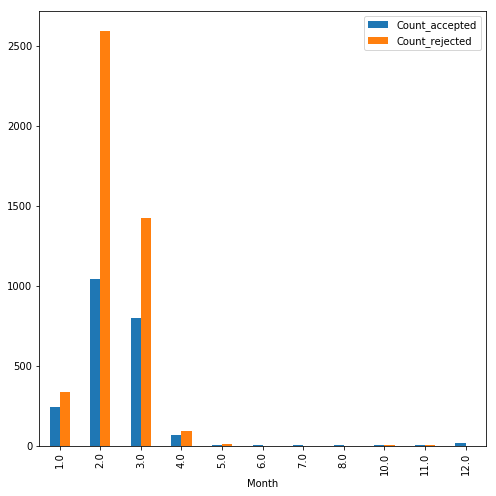

In [314]:
df = pd.DataFrame.from_csv('data/stanford.csv')
pd.to_datetime(['2005/11/23', '2010.12.31', '15-Mar-2018'])
df[['Date','Post_Date']] = df[['Date','Post_Date']].apply(pd.to_datetime, errors='coerce')

accepted = df[df['Status']=='Accepted']
rejected = df[df['Status']=='Rejected']

a_bar = accepted['Date'].groupby(accepted['Date'].dt.month).count()
r_bar = rejected['Date'].groupby(rejected['Date'].dt.month).count()

a_bar = pd.DataFrame(a_bar)
a_bar.rename(columns={'Date':'Count'}, inplace=True)
a_bar.index.name = 'Month'

r_bar = pd.DataFrame(r_bar)
r_bar.rename(columns={'Date':'Count'}, inplace=True)
r_bar.index.name = 'Month'

result = a_bar.join(r_bar, lsuffix='_accepted', rsuffix='_rejected')

result.plot(kind='bar', figsize=(8,8))

### Possible Applications and Future

As can be seen, there are a lot of different summaries that can be gleaned from the datasets. Universities can easily be compared and application data easily visualized.

In the future, I hope to be able to provide an extensive report tailored to the users needs. For example, the user will be able to provide a search string, and the application will create and display an extensive report, including visuals and comprehensive summaries of the search data (such as average GPAs of applicants, the month of expected notification, etc.)

Or, a user may provide multiple universities and the application will provide metrics and visualizations that compare the various universities.

The comments column of the data has so far been ignored. However, these comments usually contain some essential application data such as the number of publications that the applicant has, letter of recommendation, internships, etc.

It is possible to extract valuable information from the comments section. For example, we could find the acceptance rates among appicants who have paublications.

In the end I hope to train models on the available data and provide users with their acceptances probabilities for the universities that they chose.